# Naive Bayes exercise

This notebook has been modified from the notebook found [here](https://www.kaggle.com/code/satarupadeb/na-ve-bayes-classification-spam-email-detection).

**Hello everyone 👋🏻,**

Welcome to a beginner-friendly guide to Naive Bayes classification! This notebook has been carefully crafted to serve as a comprehensive companion for those who are taking their first steps into the world of machine learning.

**If you're just starting out with machine learning,** this guide is designed specifically for you. We'll walk through the Naive Bayes classification technique in a way that's easy to understand, even if you're new to this exciting field 🤩.

**By the time you finish this guide,** you'll have a solid grasp of how Naive Bayes works and how it can be used to make predictions and when you should use it 🙌.

**Let's dive in and unlock the power of Naive Bayes classification for beginners!**


# Naïve Bayes Classification : Spam Email Detection
***Classifier to identify spam emails from legitimate ones***

![classification](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*_igArwmR7Pj_Mu_KUGD1SQ.png)



**What is Naive Bayes Classification?**

In 1763, the English statistician and philosopher Thomas Bayes proposed the Bayes Theorem, which serves as the fundamental principle of conditional probability. This theorem states that the likelihood of an event occurring, given the occurrence of another event, is equal to the conditional probability of the second event given the first event, multiplied by the probability of the first event itself.

Naive Bayes is a popular classification approach that is rooted in Bayes' theory. The posterior class probability of a test data point can be calculated using class-conditional density estimation and class prior probability. The test data will then be assigned to the class with the highest posterior class probability.
![Bayes Theorem](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*CnoTGGO7XeUpUMeXDrIfvA.png)

<!-- ![Bayes Theorem](https://images.app.goo.gl/7qNoQuk5iEn1gYFZ6) -->



> Let’s look at another simple example. Let’s say that you are developing a test for cancer that is 99% sensitive and specific (meaning that the test will produce 99% true positives for people with cancer and 99% true negatives for people without cancer). Furthermore, let’s say that 0.2% of the sample population are people who actually have cancer. What's the probability of having cancer given a randomly chosen person tests positive?  Well let’s do the math!

> First of all rewrite some of this... so if the test has a true positive rate of .99 and a true negative rate of .99, then the false positive rate is .01 and false negative rate is .01.  

> Now, lets say the rate of cancer in the population is P(A)= .002.  And the probability that the test is positive given a person has cancer is P(B|A)= .99.  Finally, the probability that a test is positive given a person does not have cancer is P(B|notA) = .01.  So now we have all we need to figure out the probability of having cancer given a postive test, P(A|B).   

In [1]:
# Try it out !
# Calculating Conditional Probability using Bayes Theorem :-
#---------------------------------------------------------------------------------------------------------------------------

P_A = float(input("Enter the probability of event A =  "))  # Probability of event A
P_B_given_A = float(input("Enter the probability of event B given event A =  "))  # Probability of event B given event A
P_B_given_notA = float(input("Enter the probability of event B given event not A =  "))  # Probability of event B given event not A

# Calculate the complement of event A
P_not_A = 1 - P_A

# Calculate the probability of event B
P_B = P_B_given_A * P_A + P_B_given_notA * P_not_A

# Calculate the conditional probability using Bayes' theorem
P_A_given_B = (P_B_given_A * P_A) / P_B

# Print the results
print(f"P(A|B) = {P_A_given_B:.2f}")


Enter the probability of event A =  .002
Enter the probability of event B given event A =  .99
Enter the probability of event B given event not A =  .01
P(A|B) = 0.17


**Why is it called Naive Bayes ?**

This classification methodology makes a naive assumption that features are independent of each other. For instance, consider the [Titanic Dataset](https://www.kaggle.com/datasets/brendan45774/test-file). When classifying using naive Bayes, we assume that data labels like age, gender, class, and cabin are all independent of each other.

It's important to note that this assumption is made to simplify our task, but in reality, these features may or may not be interrelated. The assumption helps us handle the complexity of the model, even though real-world data relationships might be more intricate.


**When should we consider using Naive Bayes?**

If we are given a condition where there are multiple events occouring at the same time and it is difficult to handle/understand tehm all at once, in such a case we may make an naive assumption considering all the events to be independent of each other. this would help us solve the problem with simplicity and comparatively less effort.


**Where can we use Naive bayes Classification ?**

A few interesting projects could be :
1. Spam Detection
2. Character Recognition
3. Whether Prediction
4. News Article Catagorization
5. Face Detection


**What are the types of Naive Bayes Classification?**

1. **Bernoulli:** The Bernoulli model is suitable when our feature vectors are binary, meaning they can only take two values (usually 0 and 1). In the context of text classification with a 'bag of words' model, the 1s represent "word occurs in the document," and the 0s represent "word does not occur in the document." This model is useful when we want to represent presence or absence of certain features in our data.

2. **Gaussian:** In classification, Gaussian is a method that assumes the features we use to describe data (like measurements or characteristics) follow a normal distribution. This means that most of the data points cluster around the average value, and fewer data points deviate far from this average.
> In case you're curious to try a Gaussian Naive Bayes example, [this](https://www.kaggle.com/code/richardcsuwandi/gaussian-naive-bayes-classifier-on-titanic-dataset) is another notebook found on Kaggle that uses the Titanic dataset.

3. **Multinomial:** Multinomial is used when we are dealing with discrete counts. For example, in text classification, instead of just checking if a word occurs in a document (like in Bernoulli), we now count how many times a word appears in the document. It's like counting how many times a specific outcome (word) is observed over several trials (words in the document).






**Why is Naive Bayes a better classifier ?**

Naive Bayes is a superior classifier because it employs probabilities to make predictions. Unlike other classifiers that rely on manually coded rules, Naive Bayes considers multiple features together, which makes it more accurate, especially with complex and large datasets.

Naive Bayes uses probabilistic methods; thus, it can adapt to changes in data over time, giving it an edge over classifiers that struggle to maintain and update their fixed rules.

# Project :
### Spam Email Detection
Utilizing machine learning techniques to build a robust and efficient spam email detection system by implementing naive bayes classifier.

**Github** : https://github.com/Satarupa22-SD/Spam_Detection (feel free to fork and use the project)

In [15]:
#Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [16]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [17]:
# Reading the data from .csv file
data = pd.read_csv('spam.csv', encoding='latin-1')

In [18]:
#display the first 5 rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


> Displaying the first 5 rows gives us an idea of how the data is arranged in the table. This helps us estimate which features are necessary and which are not.
> Note : The label `ham` denotes non spam emails.

### Data Preprocessing

#### What is Data Preprocessing ?

In simpler terms, data preprocessing refers to cleaning of the data. It is like chopping and cleaning the veggies before cooking them.

***Defination :***
*Data preprocessing is the act of cleaning, converting, and organizing raw data such that it may be fed into a machine learning or data analysis algorithm in a more useable and structured shape.*


#### why is it necessary ?

**Quality assurance:** Raw data may have errors, inconsistencies, or missing numbers. By addressing these challenges, preprocessing ensures data quality.

**Better Results:** Accurate, dependable insights are generated by good data. Clean, well-organized data helps algorithms function better.

**Feature Engineering:** By combining existing features, you can construct new, useful ones that improve the model's capacity to grasp the data.

**Reduced Noise:** Outliers or extreme values might cause results to be distorted. Preprocessing assists in identifying and dealing with them.

**Standardization:** Different data sources may have varying units or scales. Data is more similar after preprocessing.

**Missing Values:** Algorithms may struggle to handle missing values. Preprocessing aids in the filling or removal of missing data.

**Efficiency:** Preparing data correctly saves time and computational resources during analysis.

In [21]:
# Drop the columns with NaN values
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

> We do not need the Not-a-Number (NaN) values, as they do not provide any insights into the data or impact other features. Therefore, we are dropping them.

In [22]:
# Rename columns for clarity:
data.columns = ['label', 'text']

In [23]:
# Displaying the first 5 rows to get basic understanding of the data
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### Separate Features and Target Labels
A typical dataset consists of input features and corresponding target labels. The input features are the attributes or variables that are used to make predictions, while the target labels are the values we are trying to predict.

*let us consider a simple example*
Imagine you're trying to teach a computer to tell whether a fruit is an apple or an orange based on its color and size. In this case,**Features** are the color and size of the fruit and **Labels** are whether the fruit is an apple or an orange.

![Apple or Orange](https://assenjekov.com/wp-content/uploads/2015/05/apple-orange.jpg)

### Key Terms :

* **train_test_split:** This function from the sklearn.model_selection module is used to split the data into training and testing sets.
* **X_train:** This variable holds the subset of input features that will be used for training the model.
* **X_test:** This variable holds the subset of input features that will be used for testing the model.
* **y_train:** This variable holds the corresponding target labels for the training set.
* **y_test:** This variable holds the corresponding target labels for the testing set.
* **test_size=0.2:** This parameter indicates that 20% of the data will be allocated for testing, and the remaining 80% will be used for training.
* **random_state=42:** This parameter is used to seed the random number generator, ensuring that the data is split in a reproducible manner. Using the same seed will produce the same split each time you run the code.

In [24]:
# Separate features (X) and target labels (y)
X =  data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Classifier (Multinomial Naive Bayes)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



**Why are we performing Count vectorization ?**

We're utilizing the **MultinomialNB()** classifier for this project, which exclusively accepts numeric values. However, our X_train and X_test datasets comprise text data (email messages). This is where **CountVectorizer()** comes in. It is being used here to convert the provided text into a vector, considering the frequency (count) of each word appearing throughout the entire text. This transformation is essential to enable the classifier to work with the text data effectively.

In [26]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

In [29]:
# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

In [30]:
# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

### Make Predictions on the Test Data

In this step, we are predicting the accuracy of our model by evaluating how precisely it can predict outcomes on new, unseen data.

In [31]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Visualizing the Data

Understanding raw numbers or datasets can often be challenging. Therefore, it is crucial to visually represent our data. By generating visual representations of data, complex patterns, trends, and relationships become easier to comprehend than when dealing with raw numbers alone. Visualization also aids in identifying anomalies within the data. In the code snippet below, we have visualized the data using a histogram that displays the distribution of spam and non-spam emails.


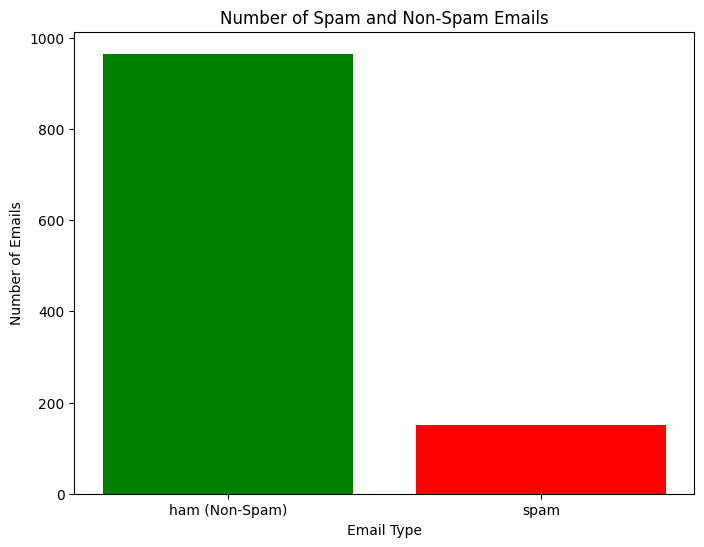

In [32]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()


# Mini coding exercise:

Ok so now can you use this classifier to input your own text, and output the probability that it's spam?

Here's an example: Create a function, `classify` that takes the scikit learn classifier and new text, and output whether the message is spam or not.

You can do something fancier if you'd like!

Use these messages to see if they're ham or spam:


>'WINNER!! This is the secret code to unlock the money: C3421.'


>'Sounds good, Tom, then see u there'

In [67]:
import re
def classify(sk_classifer, message):
  '''
   classifier: sklearn naive bayes classfier
   message: a string
   '''
  ## Your code here

  print(predictions)

In [68]:
classify(classifier, 'Sounds good, Tom, then see u there')

ham


## Reference :

    [1] Ren, Jiangtao, Sau-dan. Lee, Xianlu Chen, Ben Kao, Reynold Cheng and David Wai-Lok Cheung. “Naive Bayes Classification of Uncertain Data.” 2009 Ninth IEEE International Conference on Data Mining (2009): 944-949.
    [2] Jamshed, Humaira, M. S. A. Khan, Muhammad Khurram, Syed Inayatullah and Sameen Athar. “Data Preprocessing: A preliminary step for web data mining.” 3C Tecnología_Glosas de innovación aplicadas a la pyme (2019): n. pag.
    [3][CountVectorizer](http://https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)